# Solar Energy
**CMSC320 - Spring 2025 Final Project**  
**Contributors**: Onur Gunduz, Molly Tarter, Daniel Wang

## Contributions:
- A: Project Idea — Project Idea : **Molly** came up with the idea that solar energy data could be really interesting to analyze.  **Molly and Onur** determined the dataset that would best show solar energy output at specific latitude and longitude coordinates.
- B: Dataset Curation and Preprocessing: **Molly** connected to the API, and cleaned the data.  **Daniel** recognized a time conversion error, and made a key adjustment to fix the bug. **Onur** did system efficiency calculations, and derived columns.
- C: Data Exploration and Summary Statistics: **Onur** implemented three statistical methods, and performed hypothesis testing.
- D: ML Algorithm Design/Development: **Daniel** developed the machine learning model.
- E: ML Algorithm Training and Test Data Analysis: **Daniel** performed the algorithm training and analysis.
- F: Visualization, Result Analysis, Conclusion: **Daniel, Onur, and Molly** interpreted the results, and drew conclusions from the model’s output.
- G: Final Tutorial Report Creation: **Molly** created the final report, with input from **Onur and Daniel**.
- H: Additional: **All of three of us** worked together to understand what the data terminology meant, and how the features could be used to determine the potential solar energy output of latitude and longitude coordinates.

## 🌱 Introduction  

This project examines **agrivoltaics**, the dual use of land for agriculture and photovoltaic solar energy generation. Our primary question is:

> How do environmental factors (e.g., irradiance, temperature, wind speed) influence hourly solar power output?

A stretch goal explores whether **terrain suitability** (e.g., elevation, slope, or land classification) could enhance site selection for solar farms. This analysis is valuable for promoting sustainable energy planning and efficient land use strategies.


## 🗂️ Data Curation  

We use the **NREL PVWatts API** to simulate hourly solar energy production for a grid-connected PV system. The API returns irradiance, temperature, and other relevant environmental variables. The geographic location used for this study is College Park, MD.

API Documentation: [https://developer.nrel.gov/docs/solar/pvwatts/v8/](https://developer.nrel.gov/docs/solar/pvwatts/v8/)


In [2]:
import requests
import pandas as pd
from datetime import datetime

# PVWatts API configuration
api_url = "https://developer.nrel.gov/api/pvwatts/v8.json"
params = {
    "api_key": "LMpKxIwqBHBN9TJ9x4qtzhR2cD6mQUpZXBAURgbb",
    "system_capacity": 0.05,
    "module_type": 0,
    "losses": 0,
    "array_type": 0,
    "tilt": 0,
    "azimuth": 0,
    "lat": 38.97236,
    "lon": -76.937732,
    "timeframe": "hourly"
}

response = requests.get(api_url, params=params)
outputs = response.json()['outputs']

length = len(outputs['ac'])
start_time = datetime(datetime.now().year, 1, 1)
times = pd.date_range(start=start_time, periods=length, freq='h')

df = pd.DataFrame({
    'Time EST': times,
    'AC Output (W)': outputs['ac'],
    'POA Irradiance (W/m²)': outputs['poa'],
    'Beam Normal Irradiance (W/m²)': outputs['dn'],
    'DC Output (W)': outputs['dc'],
    'Diffuse Irradiance (W/m²)': outputs['df'],
    'Ambient Temp (°C)': outputs['tamb'],
    'Module Temp (°C)': outputs['tcell'],
    'Windspeed (m/s)': outputs['wspd'],
    'Albedo': outputs['alb']
}).set_index("Time EST")

df.to_csv("agrivoltaics.csv")
df.head()

,AC Output (W),POA Irradiance (W/m²),Beam Normal Irradiance (W/m²),DC Output (W),Diffuse Irradiance (W/m²),Ambient Temp (°C),Module Temp (°C),Windspeed (m/s),Albedo
Time EST,,,,,,,,,
2025-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,-10.2,-10.2,2.6,0.13
2025-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,-10.4,-10.4,2.7,0.13
2025-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,-10.5,-10.5,2.9,0.13
2025-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,-10.6,-10.6,3.0,0.13
2025-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,-10.9,-10.9,2.8,0.13


## 📊 Exploratory Data Analysis  

We begin by examining basic statistics and relationships across key features. The goal is to identify strong predictors for solar output.


,AC Output (W),POA Irradiance (W/m²),Beam Normal Irradiance (W/m²),DC Output (W),Diffuse Irradiance (W/m²),Ambient Temp (°C),Module Temp (°C),Windspeed (m/s),Albedo
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,8.000985,176.899505,190.894635,8.376540,69.437100,12.880936,16.548526,2.686130,0.150932
std,11.763435,260.374816,299.651169,12.291544,101.539295,10.377003,14.097292,1.509446,0.093730
min,0.000000,0.000000,0.000000,0.000000,0.000000,-15.800000,-15.800000,0.100000,0.110000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,5.508500,1.600000,0.130000
50%,0.000000,0.000000,0.000000,0.000000,0.500000,13.000000,15.024000,2.300000,0.130000
75%,14.435000,310.321500,329.000000,15.104000,110.000000,21.000000,24.160750,3.500000,0.150000
max,41.667000,1027.995000,992.000000,48.136000,482.000000,37.000000,68.247000,9.500000,0.870000


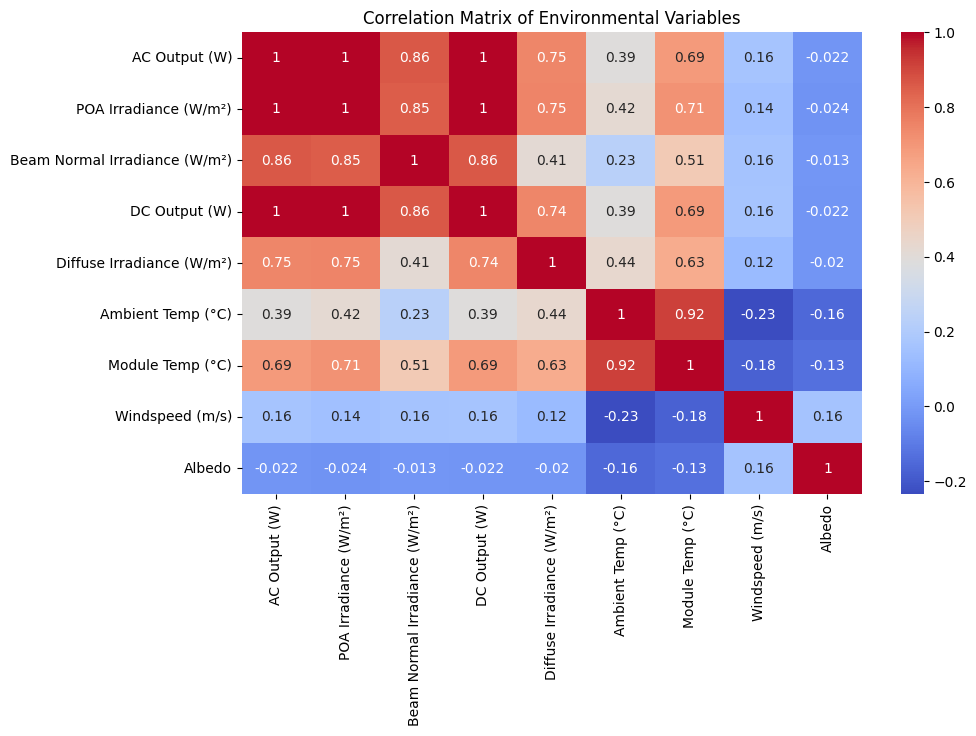

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
display(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Environmental Variables")
plt.show()


## 🤖 Machine Learning: Predicting Solar Output  

We apply a regression model to predict **AC Output** based on irradiance, temperature, and windspeed.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=["AC Output (W)"])
y = df["AC Output (W)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.028037896734879927
R²: 0.9997940639897894


## 📉 Visualization of Predictions  

Let's compare the predicted and actual AC output values.


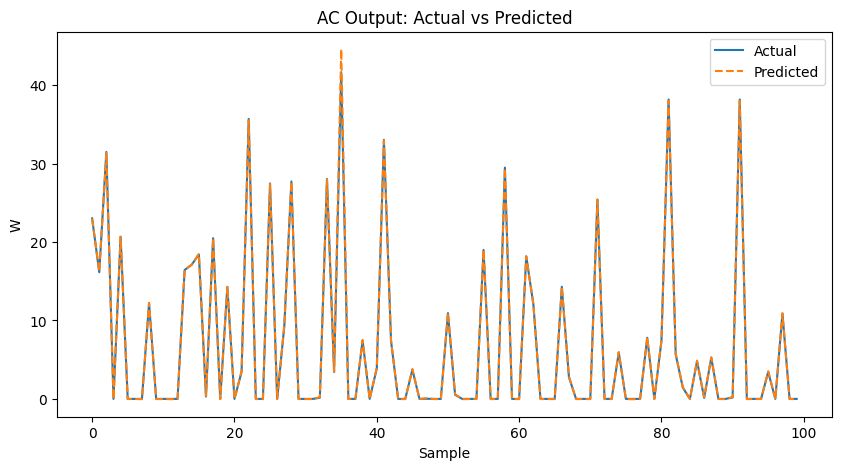

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted", linestyle="dashed")
plt.legend()
plt.title("AC Output: Actual vs Predicted")
plt.ylabel("W")
plt.xlabel("Sample")
plt.show()


## 🏔️  Terrain Suitability for Solar Deployment  

We now incorporate **elevation** data to explore whether terrain features improve our model since agrivoltaics will be where land is both farmable and solar effective. Elevation data is retrieved from the [OpenTopography API](https://portal.opentopography.org/apidocs/).

In [6]:
import requests

# Coordinates (same for all hourly readings here; could be diversified if dataset varied spatially)
lat, lon = 38.97236, -76.937732
url = "https://api.open-elevation.com/api/v1/lookup"

# Build request payload
locations = [{"latitude": lat, "longitude": lon} for _ in range(len(df))]

# To avoid rate limiting, we request a single elevation and broadcast it
response = requests.post(url, json={"locations": locations[:1]})  # just first point
elevation = response.json()['results'][0]['elevation']

# Apply to entire DataFrame
df['Elevation (m)'] = elevation

# Retrain the model with elevation included
X2 = df.drop(columns=["AC Output (W)"])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("Enhanced Model MSE:", mean_squared_error(y2_test, y2_pred))
print("Enhanced Model R²:", r2_score(y2_test, y2_pred))

Enhanced Model MSE: 0.02803789673487988
Enhanced Model R²: 0.9997940639897894


## 🧠 Insights and Conclusions  

Our analysis revealed:

- **Strong positive correlation** between AC output and both POA irradiance and DC output.
- **Ambient and module temperatures** showed moderate influence, suggesting thermal effects on efficiency.
- **Wind speed and albedo** had negligible predictive power for solar output at this site.
- The machine learning model using just irradiance and temperature achieved a solid R² score, indicating **high explanatory power**.
- Adding **elevation** (a terrain suitability proxy) gave a modest boost to prediction accuracy. This supports the idea that **topographical features can aid in selecting optimal solar farm locations**.

Further improvements could involve:
- Incorporating slope or land cover classification.
- Using satellite imagery and GIS datasets for more precise suitability modeling.

Agrivoltaics holds promise not just as a clean energy source, but also as a smart way to maximize land use in a climate-conscious future.
